In [143]:
import cv2
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
%matplotlib inline

In [144]:
img = cv2.imread('./data/elon musk/XPRIZE Foundation Bio - Elon Musk.jpg')

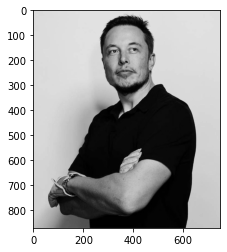

In [145]:
# image to grey
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

### Open CV Har Cascade technique to detect faces
- link : [Har Cascade](https://docs.opencv.org/4.5.4/d2/d99/tutorial_js_face_detection.html)

#### Detecting the face and eyes in an image

In [146]:
# detecting eyes
eye_cascade = cv2.CascadeClassifier(r'C:\Users\kalpr\.conda\pkgs\libopencv-4.0.1-hbb9e17c_0\Library\etc\haarcascades\haarcascade_eye.xml')
faces = eye_cascade.detectMultiScale(gray)
(x, y, w, h)  = faces[0]
for (x, y, w, h) in faces:
  face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 3)

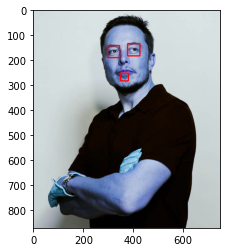

In [147]:
plt.imshow(face_img)

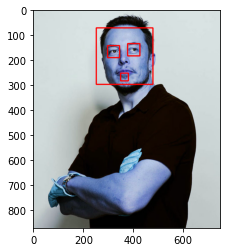

In [148]:
# detect faces in image using openCV harCascade
face_cascade = cv2.CascadeClassifier(r'C:\Users\kalpr\.conda\pkgs\libopencv-4.0.1-hbb9e17c_0\Library\etc\haarcascades\haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray)
(x, y, w, h)  = faces[0]
for (x, y, w, h) in faces:
  face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 3)

plt.imshow(face_img)

In [149]:
(x,y,w,h) = faces[0]
crop_img = face_img[y:y+h, x:x+w]

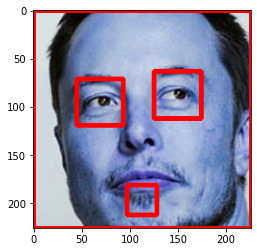

In [150]:
plt.imshow(crop_img)

### Batch Process [Face Extraction]
- extracting faces from the images
- storing them in a separate folder

In [ ]:
# haar classifier defined
face_cascade = cv2.CascadeClassifier(r'C:\Users\kalpr\.conda\pkgs\libopencv-4.0.1-hbb9e17c_0\Library\etc\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'C:\Users\kalpr\.conda\pkgs\libopencv-4.0.1-hbb9e17c_0\Library\etc\haarcascades\haarcascade_eye.xml')

In [152]:
import os
# finds face in image for path and returns cropped image
def face_finder(image_path=''):
  print(image_path)
  
  if image_path[-3:] != 'jpg':
    return
  
  image_ = ''
  image_gray = ''
  try:
    image_ = cv2.imread(image_path)
    image_gray = cv2.cvtColor(image_, cv2.COLOR_RGB2GRAY)
  except Exception as e:
    print(e)
    return
    
  faces = face_cascade.detectMultiScale(image_gray,1.3,5)
  
  #check if only a single face is found
  if len(faces) == 1:
    # check if there are two eyes
    eyes = eye_cascade.detectMultiScale(image_gray)
    if len(eyes) > 1:
      # return cropped image
      (x, y, w, h) = faces[0]
      image_cropped = image_[y:y+h, x:x+w]
      return image_cropped
    else:
      return
  else:
    return


In [155]:
image_file_path = {}

# function to loop through all images and gather cropped images
def face_collector(data_location='./data'):
  for folder in os.listdir(data_location):
    
    # storing image path of each person
    image_file_path[folder] = []
    
    for image_name in os.listdir(data_location+'/'+folder):
      # get cropped image
      
      cropped_image = face_finder(data_location+'/'+folder+'/'+image_name)
      if cropped_image is not None:
        cropped_folder = folder
        # check if -cropped folder exist
        if(cropped_folder in os.listdir(data_location+'/cropped')):
          # folder exists
          path = data_location+'/cropped/'+cropped_folder+'/'+image_name
          cv2.imwrite(path, cropped_image)
          image_file_path[folder].append(path)
        else:
          os.mkdir(data_location+'/cropped/'+cropped_folder)
          path = data_location+'/cropped/'+cropped_folder+'/'+image_name
          cv2.imwrite(path, cropped_image)
          

### Generate cropped image dataset

In [158]:
# running function to create train data
face_collector()

./data/elon musk/10 Intriguing Facts About Elon Musk... (1).jpg
./data/elon musk/10 Intriguing Facts About Elon Musk... (2).jpg
./data/elon musk/10 Intriguing Facts About Elon Musk....jpg
./data/elon musk/15 Interesting Facts About Elon Musk....webp
./data/elon musk/17_ Elon Musk Had To Be Retested Since....webp
./data/elon musk/2007_ Elon Musk....jpg
./data/elon musk/5 times Elon Musk proved he_s the world....jpg
./data/elon musk/7 Productivity Rules Elon Musk Says....jpg
./data/elon musk/8 ideas by Elon Musk you should know....webp
./data/elon musk/A Day In The Life Of Elon Musk - YouT.jpg
./data/elon musk/A Job Anywhere....webp
./data/elon musk/About Elon Musk....jpg
./data/elon musk/About Elon Musk.jpeg
./data/elon musk/Amazon.com_ Elon Musk_ El empresario ....jpg
./data/elon musk/Bitcoin scammer posing to be Elon Musk.jpg
./data/elon musk/Bitcoin_ what Elon Musk_s U-turn on....jpeg
./data/elon musk/Buy Elon Musk_s Starlink Internet Plans....jpg
./data/elon musk/Buy Elon Musk_s Sta

In [164]:
image_file_path['warren buffett']

['./data/cropped/warren buffett/13 Stocks Warren Buffett Is Selling....jpg',
 './data/cropped/warren buffett/25 Surprising Facts About Warren Buffett (1).jpg',
 './data/cropped/warren buffett/3 Stocks Warren Buffett Should Use His....jpg',
 './data/cropped/warren buffett/A Yahoo Financial News Interview....jpg',
 './data/cropped/warren buffett/Apple_s Stock Price Reaches All-Time....jpg',
 './data/cropped/warren buffett/Berkshire Hathaway Portfolio....jpg',
 './data/cropped/warren buffett/Berkshire Hathaway stock....jpg',
 './data/cropped/warren buffett/Berkshire Hathaway Stock_ The Ultimate....jpg',
 './data/cropped/warren buffett/Berkshire Hathaway _ Warren Buffett... (1).jpg',
 './data/cropped/warren buffett/Berkshire Hathaway_s Warren Buffett....jpg',
 './data/cropped/warren buffett/Bill Gates and Warren Buffett team up....jpg',
 './data/cropped/warren buffett/Bill Gates and Warren Buffett_s....jpg',
 './data/cropped/warren buffett/Binance CEO Says He and Warren Buffett... (1).jpg'

<img src="assets/cropped_data_Set.jpg" alt="drawing" width="600"/>

### Wavelet Transformation
- why use this technique?
  - one of the best technique for feature extraction from image

In [165]:
import pywt

def w2d(img, mode='haar', level=1):
  imArray = img
  #Datatype conversions
  #convert to grayscale
  imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
  #convert to float
  imArray =  np.float32(imArray)   
  imArray /= 255
  # compute coefficients 
  coeffs=pywt.wavedec2(imArray, mode, level=level)

  #Process Coefficients
  coeffs_H=list(coeffs)  
  coeffs_H[0] *= 0

  # reconstruction
  imArray_H=pywt.waverec2(coeffs_H, mode)
  imArray_H *= 255
  imArray_H =  np.uint8(imArray_H)

  return imArray_H

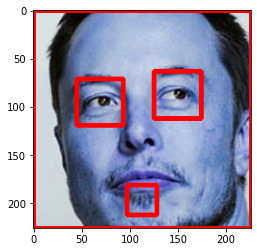

In [166]:
plt.imshow(crop_img)

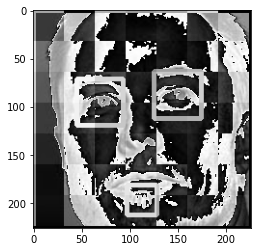

In [167]:
# transformed image
transformed_image = w2d(crop_img, 'db1', 5)
plt.imshow(transformed_image, cmap='gray')

In [173]:
crop_img.shape

(226, 226, 3)

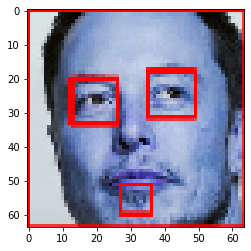

In [260]:
crop_img_resize = cv2.resize(crop_img, (64,64))
plt.imshow(crop_img_resize, cmap='gray')

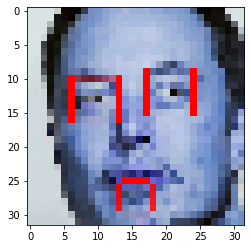

In [258]:
crop_img_resize = cv2.resize(crop_img, (32,32))
transformed_image_resize = cv2.resize(transformed_image, (32,32))

stacked_img = np.vstack((crop_img_resize.reshape(32*32*3,1),transformed_image_resize.reshape(32*32,1)))

plt.imshow(crop_img, cmap='gray')
plt.imshow(crop_img_resize, cmap='gray')


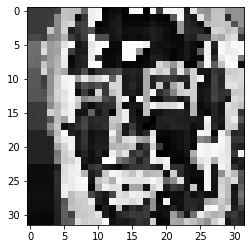

In [184]:
plt.imshow(transformed_image_resize, cmap='gray')

### why are we stacking the transformed image and the original image data?
<img src='./assets/stack_image_example.jpg' width=100>

- we are getting all the extracted features from the wavelet transformed image.[_transformed image highlight the main features used for recognition_]
- we will also provide the model with the original image so that it might provide extra _insight_ to the model when in training process

In [186]:
person_dict = {}
count = 0

for person, images in image_file_path.items():
  if(person == 'cropped'):
    continue
  else:
    person_dict[person] = count
    count += 1


In [187]:
person_dict

{'elon musk': 0,
 'jack ma': 1,
 'jeff bezos': 2,
 'richard branson': 3,
 'warren buffett': 4}

In [261]:
# creating training data [X,y]
X = []
y = []

for person, images in image_file_path.items():
  for image_path in images:
    img = cv2.imread(image_path)
    if img is not None:
      img_scaled = cv2.resize(img, (64,64))
      img_wave_transformed = w2d(img_scaled, 'db1', 5)
      img_wave_transformed_scaled = cv2.resize(img_wave_transformed, (64,64))
      
      img_combined = np.vstack((img_scaled.reshape(64*64*3,1), img_wave_transformed_scaled.reshape(64*64,1)))
      
      X.append(img_combined)
      y.append(person_dict[person])

In [264]:
X = np.array(X).reshape(len(X), 16384).astype(float)

In [266]:
X[0]

array([192., 181., 172., ...,  74.,  72.,  72.])

#### Model Training
- starting with SVM classifier as it usually gives good results

In [267]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [268]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [269]:
pipe_1 = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C = 10))])

pipe_1.fit(X_train, y_train)
pipe_1.score(X_test, y_test)

0.6865671641791045

In [270]:
print(classification_report(y_test, pipe_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76        22
           1       0.71      0.60      0.65        20
           2       0.56      0.69      0.62        13
           3       0.78      0.78      0.78         9
           4       0.50      0.33      0.40         3

    accuracy                           0.69        67
   macro avg       0.66      0.64      0.64        67
weighted avg       0.69      0.69      0.68        67



In [271]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [272]:
model_params = {
  'svm' : {
    'model' : SVC(gamma='auto'),
    'params':{
      'C': [1,10,20],
      'kernel' : ['rbf', 'linear']
    }
  },
  'random_forest' : {
    'model' : RandomForestClassifier(),
    'params':{
      'n_estimators': [1,5,10,20,25],
      'criterion' : ['gini', 'entropy']
    }
  },
  'logistic_regression' : {
    'model' : LogisticRegression(max_iter=500),
    'params':{
      'C': [1,2,3,4,5,10]
    }
  }
}

In [273]:
model_params

{'svm': {'model': SVC(gamma='auto'),
  'params': {'C': [1, 10, 20], 'kernel': ['rbf', 'linear']}},
 'random_forest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [1, 5, 10, 20, 25],
   'criterion': ['gini', 'entropy']}},
 'logistic_regression': {'model': LogisticRegression(max_iter=500),
  'params': {'C': [1, 2, 3, 4, 5, 10]}}}

In [277]:
from sklearn.model_selection import GridSearchCV
scores = []
best_estimators = {}
for model, config in model_params.items():
  print(model)
  clf = GridSearchCV(config["model"], config["params"], cv=5, return_train_score=5)
  clf.fit(X_train, y_train)
  scores.append({
    'model': model,
    'score' : clf.best_score_,
    'best_params': clf.best_params_
  })
  best_estimators[model] = clf.best_estimator_


svm
random_forest
logistic_regression


In [278]:
df = pd.DataFrame(scores)

In [279]:
df

,model,score,best_params
0,svm,0.739623,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.618868,"{'criterion': 'entropy', 'n_estimators': 20}"
2,logistic_regression,0.769811,{'C': 5}


### saving the model

In [289]:
# logistic regresion is giving the best result
best_clf = best_estimators['logistic_regression']

In [291]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[17,  3,  0,  1,  1],
       [ 1, 13,  4,  2,  0],
       [ 2,  0, 10,  1,  0],
       [ 0,  0,  2,  7,  0],
       [ 0,  0,  0,  0,  3]], dtype=int64)

Text(33.0, 0.5, 'truth')

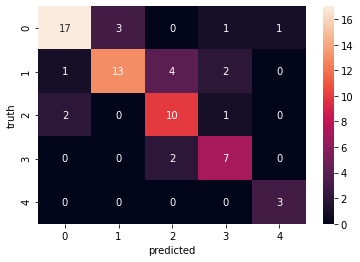

In [293]:
import seaborn as sb
sb.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [294]:
person_dict

{'elon musk': 0,
 'jack ma': 1,
 'jeff bezos': 2,
 'richard branson': 3,
 'warren buffett': 4}

In [297]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

#### Saving person_dict
_will be used later_

In [299]:
import json
with open("person_dict.json", "w") as f:
  f.write(json.dumps(person_dict))